 ***EFFICIENT RAINFALL PREDICTION USING A DIMENSIONALITY REDUCTION METHOD***

In [ ]:
# Importing Important Libraries
import pandas as pd
import seaborn as sn 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from lazypredict.Supervised import LazyClassifier

In [ ]:
data= pd.read_csv('/content/new data.csv')

In [ ]:
data.shape

(2554, 9)

In [ ]:
data.columns

Index(['AWND', 'PRCP', 'TAVG', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5'], dtype='object')

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.loc[0:7]

,AWND,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,12.30,0,21,28,17,260.00,260.00,21.90,33.10
1,4.03,0,19,25,8,240.00,260.00,15.00,19.90
2,5.82,1,21,32,10,130.00,140.00,14.10,19.00
3,10.07,1,28,32,8,320.00,310.00,21.90,30.00
4,9.62,1,7,9,1,270.00,270.00,23.00,31.10
5,10.29,0,7,16,2,240.00,230.00,18.10,25.90
6,13.65,1,5,10,-2,320.00,330.00,28.00,40.00
7,13.65,1,9,16,5,180.00,260.00,21.00,27.10


In [ ]:
#Data Pre-Processing
data['PRCP'].loc[data['PRCP'] > 0] = 1
data.PRCP= data.PRCP.astype(int)

In [ ]:
data['PRCP'].value_counts()

0    1482
1    1055
Name: PRCP, dtype: int64

In [ ]:
data= data[['AWND', 'TAVG', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'PRCP']]

In [ ]:
# Full Feature Set
predictors= data.iloc[:, 0:8]
labels= data.iloc[:,-1]

In [ ]:
# Selected Feature Set
X= data[['AWND', 'TMAX','TMIN', 'WSF2', 'WSF5']]
Y= data.iloc[:,-1]

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size=0.2)

In [ ]:
# Using the Lazy Predict Library for Classification Results
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)

In [ ]:
# Scaling the Data
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# Applying PCA
pca = PCA(n_components = 0.90)
pca.fit(x_train)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

In [ ]:
pca.explained_variance_ratio_

In [ ]:
#Feature Selection using RFE and Logistic Regression

In [ ]:
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(predictors, labels)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 5
Selected Features: [ True False  True  True False False  True  True]
Feature Ranking: [1 2 1 1 3 4 1 1]


In [ ]:
predictors.columns

Index(['AWND', 'TAVG', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5'], dtype='object')

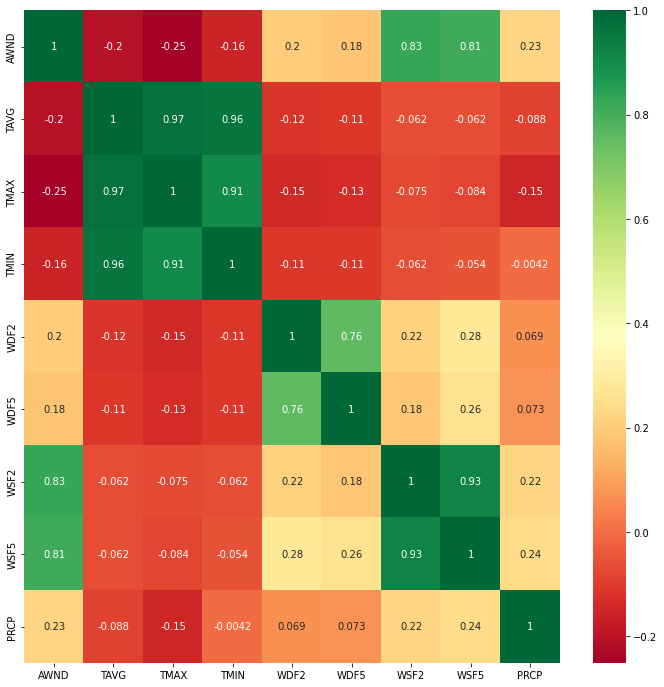

In [ ]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,12))
#plot heat map
g=sn.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Classification Results

In [ ]:
models # Classification Results using Full Feature Set

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.70,0.69,0.69,0.70,0.09
AdaBoostClassifier,0.70,0.69,0.69,0.70,0.14
XGBClassifier,0.69,0.67,0.67,0.68,0.21
QuadraticDiscriminantAnalysis,0.69,0.67,0.67,0.68,0.02
SVC,0.69,0.67,0.67,0.68,0.18
Perceptron,0.68,0.67,0.67,0.68,0.01
NuSVC,0.68,0.67,0.67,0.68,0.41
ExtraTreesClassifier,0.69,0.66,0.66,0.68,0.26
RandomForestClassifier,0.68,0.66,0.66,0.68,0.38


In [ ]:
models # Classification Results using PCA on Full Feature Set

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.71,0.71,0.71,0.71,0.02
GaussianNB,0.72,0.70,0.70,0.72,0.02
QuadraticDiscriminantAnalysis,0.71,0.70,0.70,0.71,0.02
SVC,0.71,0.69,0.69,0.71,0.17
AdaBoostClassifier,0.70,0.69,0.69,0.70,0.17
LinearDiscriminantAnalysis,0.70,0.69,0.69,0.70,0.02
RidgeClassifierCV,0.70,0.69,0.69,0.70,0.02
RidgeClassifier,0.70,0.69,0.69,0.70,0.02
LogisticRegression,0.70,0.69,0.69,0.70,0.02


In [ ]:
models # Classification Results using Reduced Feature Set

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.74,0.72,0.72,0.74,0.01
SGDClassifier,0.70,0.72,0.72,0.70,0.02
SVC,0.72,0.71,0.71,0.72,0.16
LogisticRegression,0.71,0.70,0.70,0.71,0.03
LinearDiscriminantAnalysis,0.71,0.70,0.70,0.71,0.02
CalibratedClassifierCV,0.71,0.70,0.70,0.71,0.31
AdaBoostClassifier,0.71,0.70,0.70,0.71,0.14
RidgeClassifierCV,0.71,0.70,0.70,0.71,0.03
RidgeClassifier,0.71,0.70,0.70,0.71,0.02


In [ ]:
models #Classification Results using PCA on Reduced Feature Set

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
KNeighborsClassifier,0.73,0.72,0.72,0.73,0.03
ExtraTreesClassifier,0.73,0.72,0.72,0.73,0.26
RandomForestClassifier,0.73,0.72,0.72,0.73,0.41
SVC,0.73,0.71,0.71,0.73,0.17
SGDClassifier,0.71,0.70,0.70,0.71,0.02
NearestCentroid,0.70,0.70,0.70,0.70,0.01
AdaBoostClassifier,0.72,0.69,0.69,0.72,0.15
LabelPropagation,0.71,0.69,0.69,0.71,0.21
BaggingClassifier,0.70,0.69,0.69,0.70,0.08
